# 다중 분류(Multiclass Classification)
### 펭귄의 종을 분류하는 문제
---
- 데이터 셋: penguins.csv


### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv
To: /content/penguins.csv
13.8kB [00:00, 15.2MB/s]       


In [ ]:
penguins = pd.read_csv('penguins.csv')
penguins.shape

(344, 7)

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# 결측치 확인
penguins.isna().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
df = penguins.dropna()
df.shape

(333, 7)

In [ ]:
df.isna().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df = df.copy() # SettingWithCopyWarning

In [ ]:
# 범주형 변수 인코딩(Encoding) 방법-1
df['species'] = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
df['island'] = df['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})
df['sex'] = df['sex'].map({'FEMALE': 0, 'MALE': 1})

In [ ]:
# # 범주형 변수 인코딩(Encoding) 방법-2
# from sklearn.preprocessing import LabelEncoder

# species_le = LabelEncoder()
# df['species'] = species_le.fit_transform(df['species'])

# island_le = LabelEncoder()
# df['island'] = island_le.fit_transform(df['island'])

# sex_le = LabelEncoder()
# df['sex'] = sex_le.fit_transform(df['sex'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


In [ ]:
X = df.drop(['species'], axis=1)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(266, 6) (67, 6)
(266,) (67,)


- 표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)

In [ ]:
y_train_oh[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_train_s.shape

(266, 6)

### 모델링(Modeling)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(6,)), 
    layers.Dense(32, activation='relu'), 
    layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,627
Trainable params: 2,627
Non-trainable params: 0
_________________________________________________________________


### 컴파일(Compile)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

### 학습(Training)

In [ ]:
EPOCHS = 150
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/150
7/7 [==============================] - 2s 117ms/step - loss: 0.9950 - acc: 0.3821 - val_loss: 0.8609 - val_acc: 0.5185
Epoch 2/150
7/7 [==============================] - 0s 16ms/step - loss: 0.8416 - acc: 0.6368 - val_loss: 0.7358 - val_acc: 0.8519
Epoch 3/150
7/7 [==============================] - 0s 19ms/step - loss: 0.7134 - acc: 0.7830 - val_loss: 0.6263 - val_acc: 0.8704
Epoch 4/150
7/7 [==============================] - 0s 12ms/step - loss: 0.6034 - acc: 0.8396 - val_loss: 0.5320 - val_acc: 0.9074
Epoch 5/150
7/7 [==============================] - 0s 21ms/step - loss: 0.5066 - acc: 0.9292 - val_loss: 0.4458 - val_acc: 0.9815
Epoch 6/150
7/7 [==============================] - 0s 19ms/step - loss: 0.4209 - acc: 0.9670 - val_loss: 0.3707 - val_acc: 0.9815
Epoch 7/150
7/7 [==============================] - 0s 23ms/step - loss: 0.3476 - acc: 0.9811 - val_loss: 0.3049 - val_acc: 0.9815
Epoch 8/150
7/7 [==============================] - 0s 22ms/step - loss: 0.2844 - acc: 0.9

- 학습 과정 시각화

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

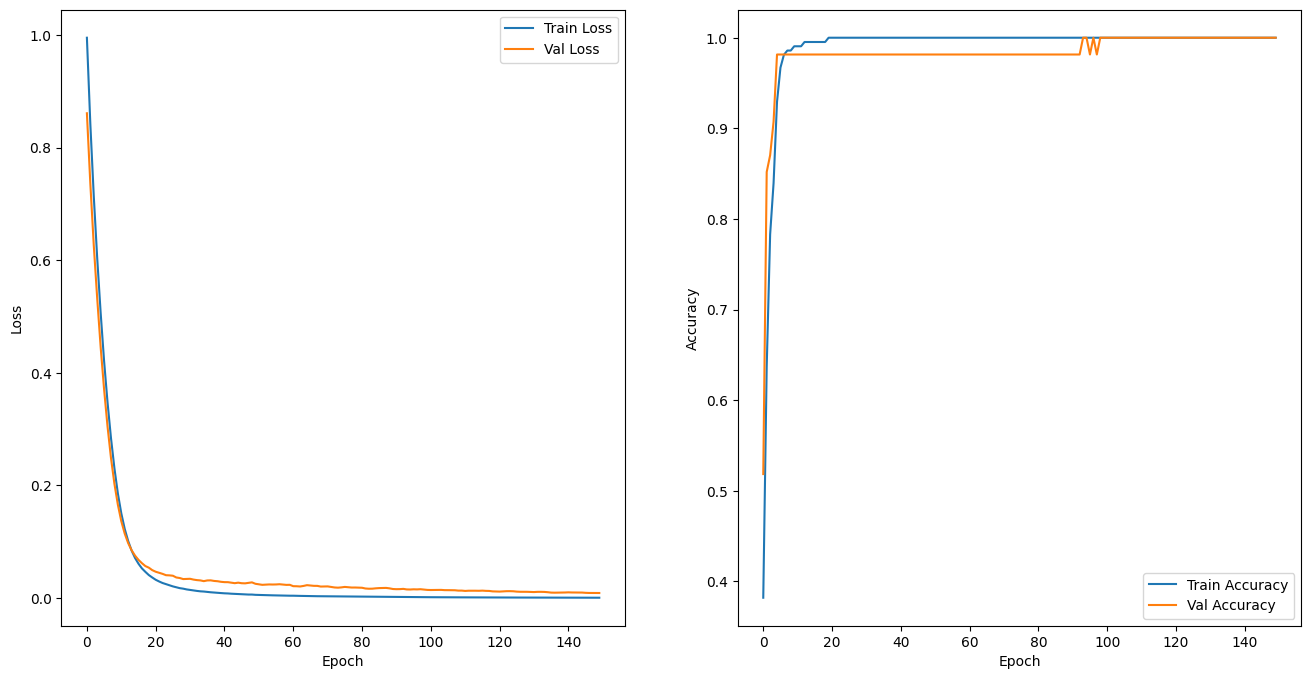

In [ ]:
plot_history(history)

### 평가(Evaluation)

In [ ]:
model.evaluate(X_train_s, y_train_oh)

9/9 [==============================] - 0s 3ms/step - loss: 0.0024 - acc: 1.0000


[0.0024318420328199863, 1.0]

In [ ]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values
y_test_oh = to_categorical(y_test)

In [ ]:
model.evaluate(X_test_s, y_test_oh)

3/3 [==============================] - 0s 7ms/step - loss: 0.0134 - acc: 0.9851


[0.013421236537396908, 0.9850746393203735]

### 예측(Prediction)

In [ ]:
y_pred = model.predict(X_test_s)

3/3 [==============================] - 0s 3ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2,
       2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2,
       0])

- 혼동 행렬(confusion matrix)

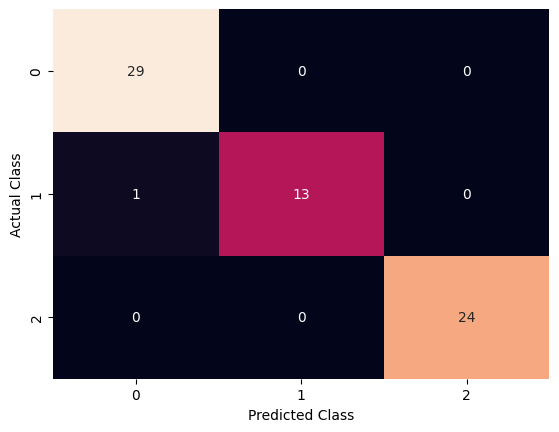

In [ ]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()